In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img_path = 'data/udacity_sdc.png'
bgr_img = cv2.imread(img_path)

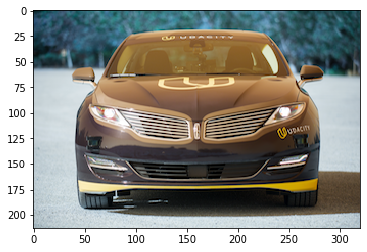

In [5]:
plt.imshow(bgr_img, cmap='gray')
plt.show()

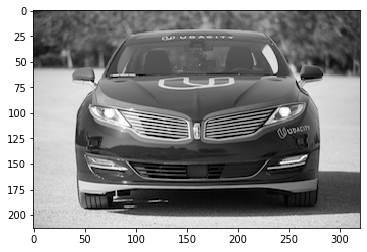

In [9]:
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

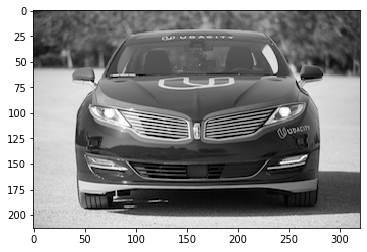

In [10]:
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
gray_img = gray_img.astype("float32")/255
plt.imshow(gray_img, cmap='gray')

In [12]:
import numpy as np
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [15]:
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

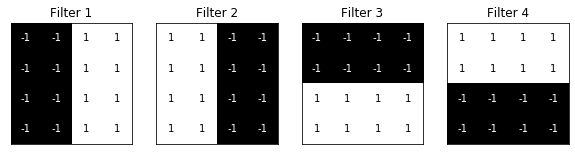

In [16]:
# visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)
